1. uloha naprogramuj hodnotu fphen alebo iného faktora od jeho parametrov
- zasiahnuť do blackboxu, aby som s cyklom to preriešila
- vykresliť graf
- veľký cieľ naprogramovať to celé
definovať fakton, fTemp, fphen, .. fixnem si niektoré parametre, iné zostávajú pohyblivé, spraviť si grafy pre dni v roku a i.
2D, 3D grafy, plot, matplotlib
ak sú tu hodnoty, ktoré sú experimentálne
zadávať fixné hodnoty
defaultné parametre, globálne premenné, iné premenné
naštuduj dictionary

	f_phen=(1-f_(phen_a )  )*(((yd-〖A_start〗_FD ))/〖f_phen〗_1FD )+f_(phen_a )
    


## Výpočet stomatálnej vodivosti
<font size = '4.5'>
T.j. vodivosti cez prieduchy rastliny
$g_{sto} = g_{max} × f_{phen} × f_{light} × max{f_{min}, (f_{temp} × f_{VDP} × f_{SVP})}$
</font>

### NAIMPORTOVANIE BALICKOV

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### NACITANIE UDAJOV PRE SLOVNIK

In [2]:
dataset = pd.read_csv("c:/Users/Anna/DO3SE_PYTHON/Dictionary.csv", delimiter=";", decimal = ",", header = [0])
# decimal = "," # v povodnom dokumente oznacujeme desatinnu ciarku ciarkou, robilo to sarapatu
    # teraz uz nebude treba menit string na float, lebo uz cisla rozpozna ako cisla

In [3]:
data = dataset.loc[:,['Name','Value']]

#### VYTVORENIE SLOVNIKA

In [4]:
dict = data.set_index('Name')['Value'].to_dict()

PREPISAT SPOJENIA ZO SLOVNIKA NA JEDNOTLIVE PREMENNE

In [5]:
for key,val in dict.items():
    exec(key + '=val')

In [6]:
# SKUSKA
print(gmax)
print(light_a)
print(gmax+Tmin+light_a)
print(VPDmax)
print(fmin)

130.0
0.01
130.01
0.5
0.13


definovať funkcie, fphen, fixnem si niektoré parametre, spraviť si grafy fphen od yd pre parametre fphena, časom 2D grafy,


## PREPIS ROVNIC Z DO3SE

## TEPLOTA VZDUCHU

<font size="4.5">
$T_{min}, \; T_{max}$ označujú minimálnu (resp. maximálnu) teplotu vzduchu, kedy rastlina je stomatálna vodivosť na inej ako minimálnej úrovni určenej $f_{min} = 0.13$. 
<br> $T$ označuje aktuálnu teplotu vzduchu.
Pre $T_{min} < T < T_{max}$ je stomatálna vodivosť určená: 
<br>

$
f_{temp} = max \left\{ f_{min}, \left[ \frac{T-T_{min}}{T_{opt}-T_{min}} \right] *
\left[ \frac{T_{max}-T}{T_{max}-T_{opt}} \right]^{bt} \right\}
$
<br> <br>
Pre $ T_{min} > T; \; T > T_{max} $ je stomatálna vodivosť: $f_{temp} = f_{min}$

<br>
$
bt = \frac{T_{max}-T_{opt}}{T_{opt}-T_{min}}
$
<br> <br>
Hodnoty pre jednotlivé $T_{max}, \; T_{opt}, \; T_{min}$ sú pre vybrané druhy a vegetačné typy k dispozícii napr. tu: <p><a href="https://www.unece.org/fileadmin/DAM/env/documents/2017/AIR/EMEP/Final__new_Chapter_3_v2__August_2017_.pdf">ICP report</a>.</p>

V nasledujúcej časti vykreslíme zmenu $f_{temp}$ pre dané $T_{max} = 35, \; T_{opt} = 14, \; T_{min} = 0$

### 2D graf
Hodnoty $ T_{max}, \; T_{opt}, \; T_{min} $ máme z dictionary
</font>

In [16]:
T = np.linspace(-15, 37, 261)                # rozsah aktuálnych teplôt vzduchu s intervalom 0.2 °C
#print(T)

bt = (Tmax-Topt)/(Topt-Tmin)                 # hodnota bt potrebná na výpočet 

In [18]:
# Výpočet fTemp pre jednotlivé hodnoty T
ftemp = []
for i in range(0,261):
    if T[i]>Tmin and T[i]<Tmax:
        ft = ((T[i]-Tmin)/(Topt-Tmin))*((Tmax-T[i])/(Tmax-Topt))**(bt)
        #print(ft)
        ftemp_prep = max(fmin, ft)
        #print(ftemp)
        ftemp.append(ftemp_prep) 
    else:
        ftemp.append(fmin) 
    
# cisto teoreticky, ak chceme numpy array
ftemp = np.array(ftemp)  


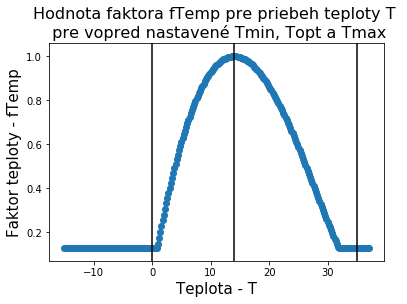

In [20]:
## GRAF 
plt.scatter(T,ftemp)

hranice = [0, 14, 35]                      # vykreslenie čiernych čiar, ktoré reprezentujú hodnoty Tmin, Topt a Tmax
for hr in hranice:
    plt.axvline(x=hr, color = 'black')

plt.title('Hodnota faktora fTemp pre priebeh teploty T \n pre vopred nastavené Tmin, Topt a Tmax', fontsize = 16)
plt.xlabel('Teplota - T', fontsize = 15)
plt.ylabel('Faktor teploty - fTemp', fontsize = 15)

plt.show()

### POZNAMKA
Hodnoty $T_{min} \; a \; T_{max}$ nekorešpondujú úplne so zlomom v grafe. Je to spôsobené funkciou, ktorá dosahuje hodnotu $f_{min} = 0.13$ pokiaľ rovnica klesne pod túto hodnotu.

## 3D grafy 
<font size="4">

Pokiaľ chceme meniť hodnoty jednotlivých $T_{min}, T_{opt}, T_{max}$, zmenou týchto parametrov dostaneme odlišné hodnoty $ f_{temp}$.
<br>
$T_{min} \; a \; T_{max}$ som prisúdila hodnoty na x-ovej a y-ovej osi. 
<br>
$T_{opt}$ sa dopočíta: $T_{opt} = \frac{T_{min} + T_{max}}{2} $
<br>
$T_{min}, \; T_{opt},\; T_{max}$ sú v kóde označené nasledovne: $T_{n}, \; T_{o},\; T_{x}$
<br /> <br />
Najprv niekoľko samostatných 3D grafov, neskôr 6 grafov spolu pre teploty $T_{0}, \; T_{5},\; T_{10},\; T_{15},\; T_{20},\; T_{25}$
<br> Pre zopakovanie: 
$
f_{temp} = max \left\{ f_{min}, \left[ \frac{T-T_{min}}{T_{opt}-T_{min}} \right] *
\left[ \frac{T_{max}-T}{T_{max}-T_{opt}} \right]^{bt} \right\}
$

</font>

In [21]:
# NACITANIE KNIZNIC
#%reset -f 
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [22]:
# VYTVORENIE meshgridu pre x-ovu a y-ovu os
dTn = np.linspace(-10.0, 35.0, 91)          # rozsahy suradnic   
dTx = np.linspace(-10.0, 35.0, 91) 
Tn,Tx = np.meshgrid(dTn, dTx)           # polia suradnic (Tni, Txi) ...

#fmin = 0.13                         

def To(Tn,Tx):                          # funkcia na urcenie optimalnej teploty z hodnot Tn a Tx
    return ((Tn + Tx)/2) 

def bt(Tn,Tx):                          # funkcia na urcenie hodnoty bt pre jednotlivé Tn, Tx
    return ((Tx-To(Tn,Tx))/(To(Tn,Tx)-Tn))

def fTemp(Tn,Tx, T = 10):               # definicia univerzalnej funkcie pre faktor teploty 
    z = np.zeros(Tn.shape)              # default počíta pre aktuálnu teplotu T = 10°C
    
    for r, row in enumerate(Tn):
            for c, col in enumerate(row):
                if Tn[r][c] + 15 > Tx[r][c]:  #podmienka - rozdiel medzi Tmax a Tmin je min 5 stupnov, v reáli to je cca 35°C
                    z[r][c] = np.nan
                elif T<Tn[r][c]:
                    z[r][c] = fmin
                elif T>Tx[r][c]:
                    z[r][c] = fmin
                else:                   # vypocet funkcie ftemp = ......     
                    z[r][c] = max(fmin,(((T-Tn[r][c])/(To(Tn[r][c],Tx[r][c])-Tn[r][c]))*((Tx[r][c]-T)/(Tx[r][c]-To(Tn[r][c],Tx[r][c])))*bt(Tn[r][c],Tx[r][c])))
    return z                

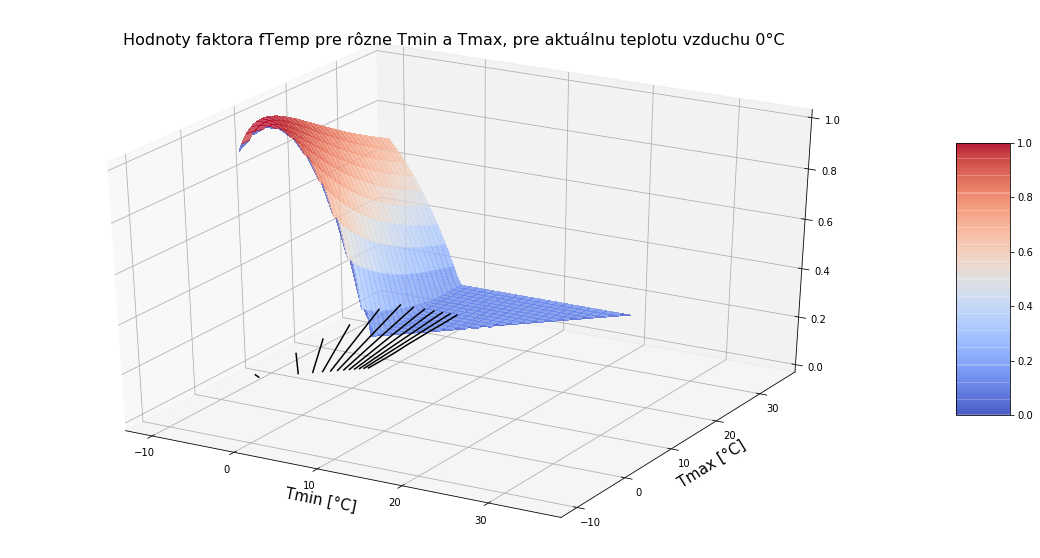

In [23]:
#from matplotlib import cm

fig = plt.figure(figsize=(20, 10))           # zobrazenie skalarneho pola
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Tn,Tx, fTemp(Tn,Tx, 0), alpha=0.7, cmap='coolwarm', linewidth=0, antialiased = False, vmin = 0, vmax = 1) #'jet') 
ax.contour(Tn, Tx, fTemp(Tn,Tx, 0), 10, colors="k", offset=0)         # contour je graf naspodku, ofset označuje umiestnenie na z-ovej osi

plt.title('Hodnoty faktora fTemp pre rôzne Tmin a Tmax, pre aktuálnu teplotu vzduchu 0°C', fontsize = 16)
plt.xlabel('Tmin [°C]', fontsize = 15)
plt.ylabel('Tmax [°C]', fontsize = 15)

fig.colorbar(surf, shrink=0.5, aspect=5)

#ax.set_xlim(0, 35)
#ax.set_ylim(0, 35)
ax.set_zlim(-0.01, 1.01)

plt.show()

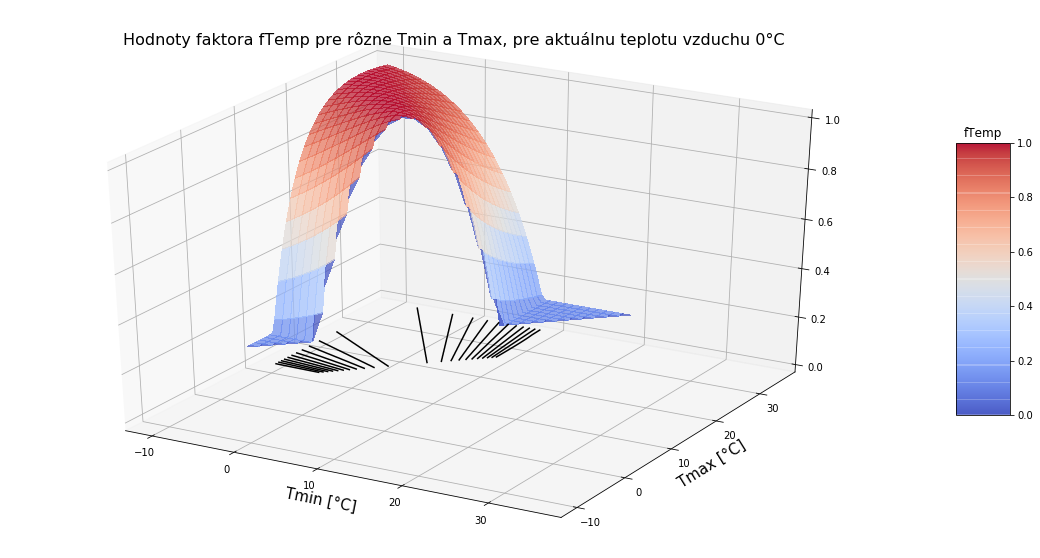

In [13]:
#from matplotlib import cm

fig = plt.figure(figsize=(20, 10))           # zobrazenie skalarneho pola
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Tn,Tx, fTemp(Tn,Tx, 10), alpha=0.7, cmap='coolwarm', linewidth=0, antialiased = False, vmin = 0, vmax = 1) #'jet') 
ax.contour(Tn, Tx, fTemp(Tn,Tx, 10), 10, colors="k", offset=0)         # contour je graf naspodku, ofset označuje umiestnenie na z-ovej osi

plt.title('Hodnoty faktora fTemp pre rôzne Tmin a Tmax, pre aktuálnu teplotu vzduchu 0°C', fontsize = 16)
plt.xlabel('Tmin [°C]', fontsize = 15)
plt.ylabel('Tmax [°C]', fontsize = 15)

clb = fig.colorbar(surf, shrink=0.5, aspect=5)
clb.ax.set_title('fTemp')

#ax.set_xlim(0, 35)
#ax.set_ylim(0, 35)
ax.set_zlim(-0.01, 1.01)

plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import scipy.interpolate as interp
from mpl_toolkits.mplot3d import Axes3D


dTn = np.linspace(0, 20.0, 50)      # rozsahy suradnic   
dTx = np.linspace(0, 20.0, 50) 
Tn,Tx = np.meshgrid(dTn, dTx)            # polia suradnic (xi, yi) ...

def To(Tn,Tx):                          # defincia funkcie 2D skalarne pole
    return ((Tn + Tx)/2) 

def bt(Tn,Tx):
    return ((Tx-To(Tn,Tx))/(To(Tn,Tx)-Tn))

def fTemp(Tn,Tx, T = 10):
    #T = 10
    z = np.zeros(Tn.shape)
    
    for r, row in enumerate(Tn):
            for c, col in enumerate(row):
                if Tn[r][c] + 10 >= Tx[r][c]:          #rozdiel medzi Tmin a Tmax minimalne 10 stupnov
                    z[r][c] = np.nan
                elif T<Tn[r][c]:
                    z[r][c] = fmin
                elif T>Tx[r][c]:
                    z[r][c] = fmin
                else:
                    z[r][c] = max(fmin,(((T-Tn[r][c])/(To(Tn[r][c],Tx[r][c])-Tn[r][c]))*((Tx[r][c]-T)/(Tx[r][c]-To(Tn[r][c],Tx[r][c])))*bt(Tn[r][c],Tx[r][c])))
    return z                


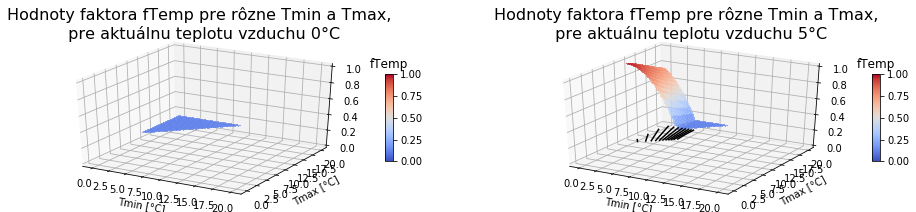

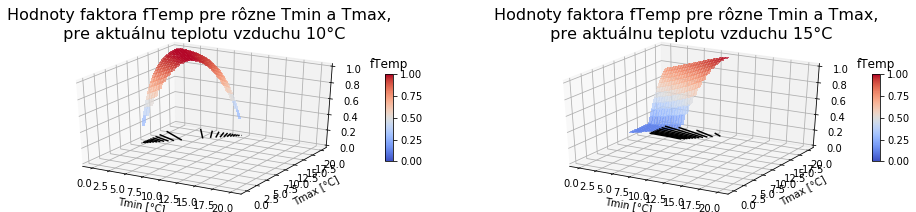

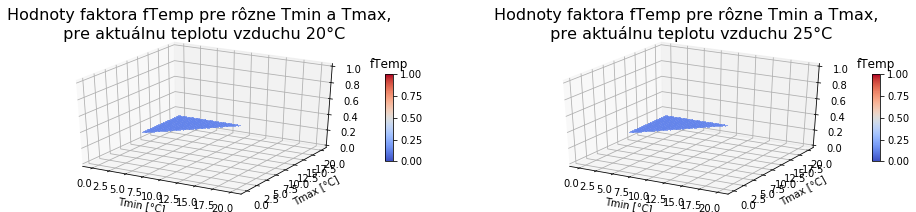

In [25]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

#from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Kod sa urcite da skratit, ale to už nie je prioritou..

# určiť pomer výšky a šírky figure
fig = plt.figure(figsize=plt.figaspect(0.2))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

#fig = plt.figure()#figsize=(15, 8))
#ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Tn,Tx, fTemp(Tn,Tx,0), alpha=0.7, cmap='coolwarm', linewidth=0, antialiased = False, vmin = 0, vmax = 1) #'jet') 
ax.contour(Tn, Tx, fTemp(Tn,Tx,0), 10, colors="k", offset=0)         # contour je graf naspodku, ofset označuje umiestnenie na z-ovej osi

plt.title('Hodnoty faktora fTemp pre rôzne Tmin a Tmax, \n pre aktuálnu teplotu vzduchu 0°C', fontsize = 16)
plt.xlabel('Tmin [°C]')
plt.ylabel('Tmax [°C]')

# plot a 3D surface like in the example mplot3d/surface3d_demo

ax.set_zlim(-0.01, 1.01)
clb = fig.colorbar(surf, shrink=0.5, aspect=10)
clb.ax.set_title('fTemp')


#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
surf = ax.plot_surface(Tn,Tx, fTemp(Tn,Tx,5), alpha=0.7, cmap='coolwarm', linewidth=0, antialiased = False, vmin = 0, vmax = 1) #'jet') 
ax.contour(Tn, Tx, fTemp(Tn,Tx,5), 10, colors="k", offset=0)         # contour je graf naspodku, ofset označuje umiestnenie na z-ovej osi
plt.title('Hodnoty faktora fTemp pre rôzne Tmin a Tmax, \n pre aktuálnu teplotu vzduchu 5°C', fontsize = 16)
plt.xlabel('Tmin [°C]')
plt.ylabel('Tmax [°C]')

ax.set_zlim(-0.01, 1.01)
clb = fig.colorbar(surf, shrink=0.5, aspect=10)
clb.ax.set_title('fTemp')


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.2))

#===============
# Third subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
surf = ax.plot_surface(Tn,Tx, fTemp(Tn,Tx,10), alpha=0.7, cmap='coolwarm', linewidth=0, antialiased = False, vmin = 0, vmax = 1) #'jet') 
ax.contour(Tn, Tx, fTemp(Tn,Tx,10), 10, colors="k", offset=0)         # contour je graf naspodku, ofset označuje umiestnenie na z-ovej osi

plt.title('Hodnoty faktora fTemp pre rôzne Tmin a Tmax, \n pre aktuálnu teplotu vzduchu 10°C', fontsize = 16)
plt.xlabel('Tmin [°C]')
plt.ylabel('Tmax [°C]')

ax.set_zlim(-0.01, 1.01)
clb = fig.colorbar(surf, shrink=0.5, aspect=10)
clb.ax.set_title('fTemp')

#===============
# Forth subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
surf = ax.plot_surface(Tn,Tx, fTemp(Tn,Tx,15), alpha=0.7, cmap='coolwarm', linewidth=0, antialiased = False, vmin = 0, vmax = 1) #'jet') 
ax.contour(Tn, Tx, fTemp(Tn,Tx,15), 10, colors="k", offset=0)         # contour je graf naspodku, ofset označuje umiestnenie na z-ovej osi

plt.title('Hodnoty faktora fTemp pre rôzne Tmin a Tmax, \n pre aktuálnu teplotu vzduchu 15°C', fontsize = 16)
plt.xlabel('Tmin [°C]')
plt.ylabel('Tmax [°C]')

ax.set_zlim(-0.01, 1.01)
clb = fig.colorbar(surf, shrink=0.5, aspect=10)
clb.ax.set_title('fTemp')


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.2))

#===============
# Fifth subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
surf = ax.plot_surface(Tn,Tx, fTemp(Tn,Tx,20), alpha=0.7, cmap='coolwarm', linewidth=0, antialiased = False, vmin = 0, vmax = 1) #'jet') 
ax.contour(Tn, Tx, fTemp(Tn,Tx,20), 10, colors="k", offset=0)         # contour je graf naspodku, ofset označuje umiestnenie na z-ovej osi

plt.title('Hodnoty faktora fTemp pre rôzne Tmin a Tmax, \n pre aktuálnu teplotu vzduchu 20°C', fontsize = 16)
plt.xlabel('Tmin [°C]')
plt.ylabel('Tmax [°C]')

ax.set_zlim(-0.01, 1.01)
clb = fig.colorbar(surf, shrink=0.5, aspect=10)
clb.ax.set_title('fTemp')

#===============
# Sixth subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
surf = ax.plot_surface(Tn,Tx, fTemp(Tn,Tx,25), alpha=0.7, cmap='coolwarm', linewidth=0, antialiased = False, vmin = 0, vmax = 1) #'jet') 
ax.contour(Tn, Tx, fTemp(Tn,Tx,25), 10, colors="k", offset=0)         # contour je graf naspodku, ofset označuje umiestnenie na z-ovej osi

plt.title('Hodnoty faktora fTemp pre rôzne Tmin a Tmax, \n pre aktuálnu teplotu vzduchu 25°C', fontsize = 16)
plt.xlabel('Tmin [°C]')
plt.ylabel('Tmax [°C]')

ax.set_zlim(-0.01, 1.01)
clb = fig.colorbar(surf, shrink=0.5, aspect=10)
clb.ax.set_title('fTemp')


plt.show()

## FENOLOGIA

### POZOR!!! 
MUSELA SOM ZMENIT HODNOTU fphen_1FD, pretože v dokumentoch ICP je tam pre smrek nula!!! A v rovnici sa neskôr fphen_1FD nachádza v menovateli!!!!!

A TO ISTE PRE fphen_4FD

DNI V ROKU

In [165]:
yd = np.array(range(1,366))
yd.shape #kontrola

(365,)

In [166]:
#yd[2]
yd[1]<(Astart_FD+fphen_1FD)
uu = (1-fphen_a)*((yd[123]-Astart_FD)/fphen_1FD) + fphen_a

In [167]:
#fphen = []
#for i in range(0,365):
#    if yd[i]>Astart_FD and yd[i]<=(Astart_FD + fphen_1FD):
#        uu = (1-fphen_a)*((yd[i]-Astart_FD)/fphen_1FD) + fphen_a
#    elif yd[i]>=(Astart_FD + fphen_1FD) and yd[i]<=(Aend_FD - fphen_4FD):
#        uu = 1
#    else:
#        uu = (1-fphen_e)*((Aend_FD-yd[i])/(fphen_4FD)) + fphen_e
#    fphen.append(uu) 
# cisto teoreticky, ak chceme numpy array
#fphen = np.array(fphen)    
#fphen

### 2. SPOSOB PHEN

In [18]:
yd[8]

9

In [19]:
fphen = []
for i in range(0,365):
    if yd[i]>Astart_FD and yd[i]<=Aend_FD:
        uu = 1
    else:
        uu = 0
    fphen.append(uu) 
# cisto teoreticky, ak chceme numpy array
fphen = np.array(fphen)    
fphen

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

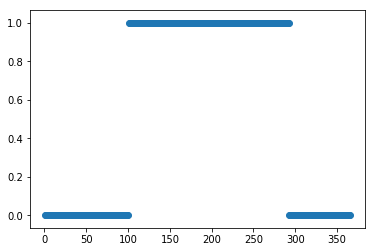

In [20]:
plt.scatter(yd,fphen)

RESP. INAK
Ak fphen_1FD a fphen_4FD je nula, potom počítame iba so strednou podmienkou, a to že fphen = 1 pre dané obdobie... inakedy je to jednoducho fmin... 
Takto to má i Svetlana v modeli.

## Flight

<font size = '4.5'>
    Vplyv žiarenia na stomatálnu vodivosť, odpoveď listov na svetelné podmienky. 

$f_{light}=1-e^{-light_a*PPFD}$
    
PPFD reprezentuje hustotu fotosyntetického toku fotónov jednotkách $ µmol.m^{-2}.s^{-1}$. 

Je potrebné vložiť údaje buď o fotosynteticky aktívnom žiarení PAR $ µmol.m^{-2}.s^{-1}$ alebo globálne žiarenie R v $Wh.m^{-2}$

Hodnota konštanty $light_a = 0.01$ 

My máme k dispozícii na staniciach Stará Lesná a Tatranská Javorina hodnoty globálneho žiarenia a na Skalnatom Plese globálne žiarenie aj PAR. 

do3se.exe vie v outpute vypísať hodnoty pre všetky parametre, ktoré chceme, teda aj $f_{light}$, avšak hodnoty mi nesedia s vloženými hodnotami globálneho žiarenia, resp. PAR. Keď na niečo prídem, alebo sa naopak nebudem vedeiť pohnúť, pridám sem ďalšie konkrétne popisky.
</font>

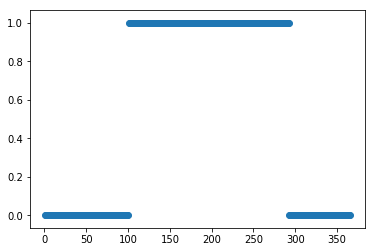

In [22]:
plt.scatter(yd,fphen)

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5723629/
https://mrcc.illinois.edu/gismaps/info/gddinfo.htm
https://www.canr.msu.edu/uploads/files/Research_Center/NW_Mich_Hort/General/CalculatingGrowingDegreeDays.pdf
https://en.wikipedia.org/wiki/Growing_degree-day


# fVPD
<font size="4.5">
Stomatálna odpoveď na vlhkosť vzduchu je definovaná cez deficit vodnej pary VPD (kPa), ktorá popisuje vysušovaciu schopnosť vzduchu. VPD sa počíta z teploty relatívnej vlhkosti vzduchu. Je rozdielom medzi potenciálnym deficitom vodnej pary $e_s(T_a)$ panujúceho vzduchu $T_a$ a aktuálnym tlakom vodných pár $e_a$.
<br>
<font size="5">$VPD = e_s(T_a) - \; e_a = e_s(T_a)(1 - RH)$</font>

a môže byť vypočítaný z teploty vzduchu $T_s [°C]$ a relatícnej vlhkosti $RH [\%]$
<br>
<font size="5">$RH = \frac{e_a}{e_s(T_a)}$</font>
<br>
<font size="5">$e_s(T_a) = a e^{\frac{b T_a}{T_a + c}}$</font>
</font>



In [169]:
import math
math.exp(1)

2.718281828459045

In [177]:
#DICTIONARY PRE fVPD
a = 0.611 #kPa
b = 17.502 
c = 240.97 #°C
# VDPmax =0.5 # je to v dictionary
# VDPmin =3 # je to v dictionary
# T teplota vzduchu definovana vyssie

# RH definuj!
RH = np.linspace(10,100,91)
RH.shape #kontrola
# import random vlhkosti

es = []
VPD = []
for i in range(91):
    es_prep = a* (10**((7.5*T[i])/(T[i]+237.5)))
    #es_prep = a * math.exp((b*T[i])/(T[i]+c)) # vzorec z DO3SE
    es.append(es_prep)
    #VPD_prep = es*(1-RH[i])
    #VPD.append(VPD_prep)
    VPD_prep = es_prep * (1 - RH[i]/100) 
    VPD.append(VPD_prep)
    # 6.11 hPa, 0.611 kPa nasytena vodna para nad vodou
    # v DO3SE to mame v kPa

In [175]:
es #kPa

[0.19073185504466802,
 0.19391563702635928,
 0.19714670725133743,
 0.20042567608871328,
 0.2037531605041233,
 0.20712978411551589,
 0.21055617724925174,
 0.214032976996518,
 0.2175608272700567,
 0.2211403788612085,
 0.2247722894972708,
 0.22845722389917275,
 0.23219585383946523,
 0.2359888582006276,
 0.23983692303369178,
 0.24374074161718268,
 0.247701014516377,
 0.25171844964287915,
 0.255793762314516,
 0.2599276753155502,
 0.26412091895721196,
 0.26837423113855025,
 0.2726883574076039,
 0.27706405102289183,
 0.28150207301522395,
 0.28600319224983234,
 0.2905681854888225,
 0.2951978374539465,
 0.2998929408896964,
 0.3046542966267194,
 0.30948271364555485,
 0.31437900914069244,
 0.3193440085849534,
 0.32437854579419256,
 0.3294834629923245,
 0.33465961087667095,
 0.3399078486836318,
 0.34522904425467826,
 0.3506240741026702,
 0.3560938234784957,
 0.3616391864380345,
 0.3672610659094451,
 0.37296037376077457,
 0.37873803086789337,
 0.38459496718275277,
 0.3905321218019667,
 0.3965504430

In [178]:
print(min(VPD))
print(max(VPD))

0.0
0.18597463759598631


In [28]:
fVPDp = []
for i in range(365):
    fVPD_prep = ((1-fmin)*(VPDmin-VPD[i])/(VPDmin-VPDmax)+fmin)
    fVPDp.append(fVPD_prep)

In [29]:
fVPDp
fVPD = []
for i in range(365):
    fVPD_prep=min(1,max(fmin, fVPDp[i]))
    fVPD.append(fVPD_prep)

In [95]:
fVPD

[1,
 1,
 1,
 0.7914278898719634,
 0.5613550770770426,
 1,
 1,
 1,
 1,
 0.9788135888717725,
 0.585960542747068,
 0.9607116827726734,
 0.13,
 1,
 1,
 0.575197204261122,
 1,
 1,
 0.9878025546666114,
 0.7866406375363731,
 0.13856396957185474,
 1,
 0.7952081815295013,
 0.508999949691398,
 0.9886710185528046,
 1,
 0.9758674405844177,
 0.9462767883011428,
 1,
 1,
 0.2099933151693075,
 1,
 1,
 1,
 1,
 0.7906561103098491,
 1,
 0.8153464997273954,
 0.958549921768302,
 0.7168123723925149,
 1,
 1,
 1,
 0.13,
 1,
 1,
 0.5278822384241499,
 0.3992690992158683,
 1,
 1,
 0.9837895263956818,
 1,
 0.8608646505862323,
 1,
 0.8960533364667601,
 0.5562633501396939,
 1,
 0.91869081057607,
 1,
 0.8702977144776569,
 0.407033247265652,
 1,
 1,
 1,
 0.3592396719514148,
 0.5456300498028327,
 1,
 1,
 0.958874267321661,
 0.6858325850127801,
 0.7834388559704318,
 0.4490855943289938,
 1,
 1,
 1,
 0.4724756268933525,
 0.548942563091962,
 1,
 1,
 1,
 1,
 1,
 1,
 0.7032790420722533,
 0.7053711080712318,
 1,
 0.320996023

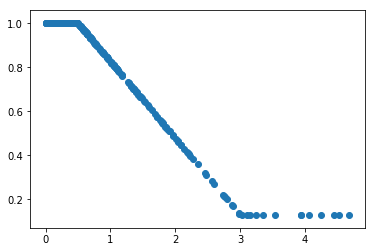

In [97]:
plt.scatter(VPD,fVPD)